# Interprete de espectros FTIR

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
archivo_espectro = 'FTIR_Library_Spectra.csv'
fields = ["Potato (raw tuber)", "Wavenumbers.1"]
x_y_data = pd.read_csv(archivo_espectro, skipinitialspace=True, usecols=fields)
x_y_data

,Wavenumbers.1,Potato (raw tuber)
0,599.7631,0.528969
1,600.2452,0.529540
2,600.7273,0.530237
3,601.2094,0.530940
4,601.6916,0.531465
...,...,...
7049,3998.2600,0.018820
7050,3998.7420,0.018801
7051,3999.2240,0.018791
7052,3999.7060,0.018788


In [4]:
#Detect de max and the mins
a = np.diff(np.sign(np.diff(x_y_data["Wavenumbers.1"]))).nonzero()[0] + 1 
# min
b = (np.diff(np.sign(np.diff(x_y_data["Wavenumbers.1"]))) > 0).nonzero()[0] + 1   
# max
c = (np.diff(np.sign(np.diff(x_y_data["Wavenumbers.1"]))) < 0).nonzero()[0] + 1    

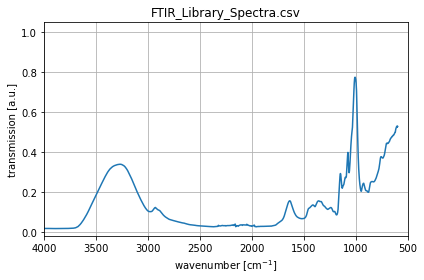

In [5]:
fig, axs = plt.subplots(1, 1) 
axs.plot(x_y_data["Wavenumbers.1"], x_y_data["Potato (raw tuber)"]) 

axs.plot(x_y_data["Potato (raw tuber)"][b], x_y_data["Wavenumbers.1"][b], "o", label="min", color='r')
axs.plot(x_y_data["Potato (raw tuber)"][c], x_y_data["Wavenumbers.1"][c], "o", label="max", color='b')

axs.set_xlim(4000, 500)
axs.set_ylim(None, 1.05)

axs.set_xlabel('wavenumber [$\mathregular{cm^{-1}]}$') 
axs.set_ylabel('transmission [a.u.]')
axs.grid(True) 
axs.set_title(archivo_espectro)
fig.tight_layout() 
plt.show()